In [1]:
import numpy as np
import pandas as pd
import math
import sklearn
import seaborn as sns
import sklearn.preprocessing
import datetime
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
train_btc= pd.read_csv('BTC-USD.csv')
test_btc = pd.read_csv('Test-BTC-USD.csv')
val_btc = pd.read_csv('Val-BTC-USD.csv')

In [3]:
train_eth= pd.read_csv('Train-ETH-USD.csv')
test_eth = pd.read_csv('Test-ETH-USD.csv')
val_eth = pd.read_csv('Val-ETH-USD.csv')

In [4]:
train_btc.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-11-22,58706.847656,59266.359375,55679.839844,56289.289063,56289.289063,35036121783
1,2021-11-23,56304.554688,57875.515625,55632.761719,57569.074219,57569.074219,37485803899
2,2021-11-24,57565.851563,57803.066406,55964.222656,56280.425781,56280.425781,36635566789
3,2021-11-25,57165.417969,59367.968750,57146.683594,57274.679688,57274.679688,34284016248
4,2021-11-26,58960.285156,59183.480469,53569.765625,53569.765625,53569.765625,41810748221


In [5]:
len(test_btc)

239

In [8]:
merged_data = pd.merge(train_btc, train_eth, on='Date', how='inner')
merged_data.rename(columns={'Close_x': 'BTC', 'Close_y': 'ETH'}, inplace=True)

In [9]:
merged_data.head()

,Date,Open_x,High_x,Low_x,BTC,Adj Close_x,Volume_x,Open_y,High_y,Low_y,ETH,Adj Close_y,Volume_y
0,2021-11-22,58706.847656,59266.359375,55679.839844,56289.289063,56289.289063,35036121783,4266.509277,4302.022949,4033.572266,4088.457764,4088.457764,19752218877
1,2021-11-23,56304.554688,57875.515625,55632.761719,57569.074219,57569.074219,37485803899,4089.680420,4385.483398,4069.766602,4340.763672,4340.763672,22133497059
2,2021-11-24,57565.851563,57803.066406,55964.222656,56280.425781,56280.425781,36635566789,4340.036133,4376.875977,4176.183594,4239.981445,4239.981445,21838037128
3,2021-11-25,57165.417969,59367.968750,57146.683594,57274.679688,57274.679688,34284016248,4271.394531,4550.518066,4249.774414,4274.743164,4274.743164,18705358318
4,2021-11-26,58960.285156,59183.480469,53569.765625,53569.765625,53569.765625,41810748221,4522.208984,4550.842285,3933.506592,4030.908936,4030.908936,26281795488


In [ ]:
#train_eth.head()

In [10]:
correlation_matrix = merged_data[['BTC', 'ETH']].corr()

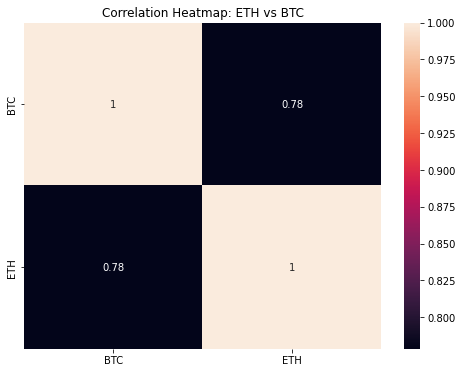

In [11]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap: ETH vs BTC')
plt.show()

In [ ]:
"""
plt.figure(figsize=(20, 10))
sns.heatmap(train_btc.corr(), train_eth, annot=True)
"""

In [ ]:
"""
Binance=Binance_data.drop(['quote_asset_volume','number_of_trades','taker_buy_base_asset_volume',
               'taker_buy_quote_asset_volume'], axis=1)
"""

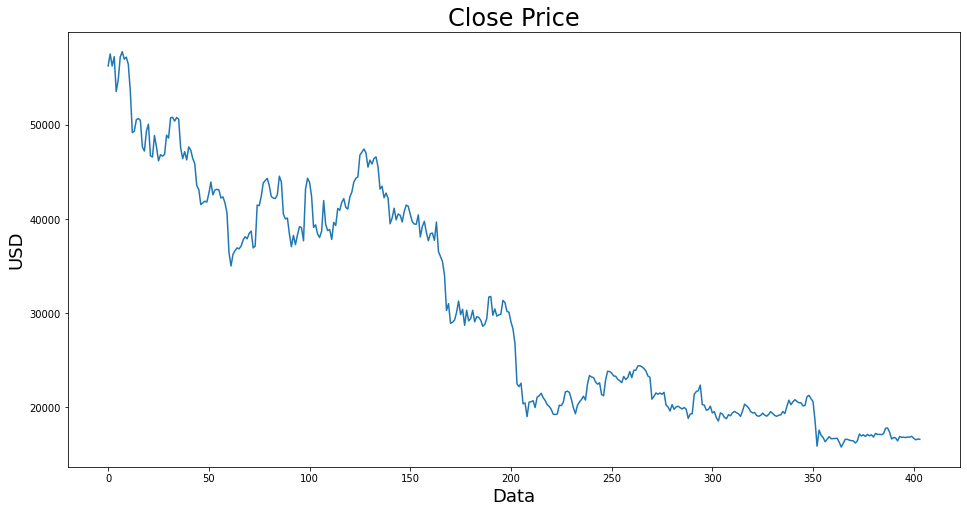

In [15]:
plt.figure(figsize=(16,8))
plt.title('Close Price', fontsize=24)
plt.plot(train_btc['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('USD', fontsize=18)
plt.show()

In [ ]:
#legend_handles = [train_btc,train_eth]

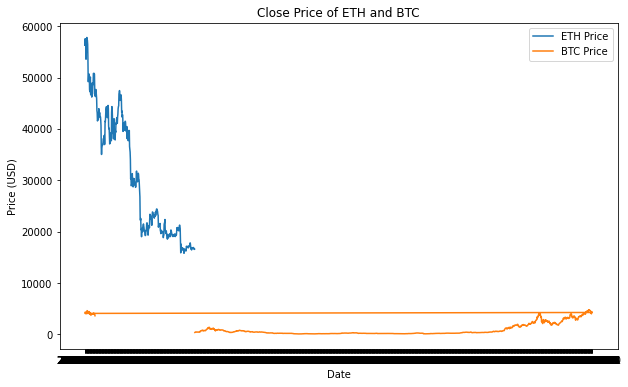

In [13]:
train_btc_close = train_btc['Close']
train_eth_close = train_eth['Close']

plt.figure(figsize=(10, 6))
plt.plot(train_btc['Date'], train_btc_close, label='ETH Price')
plt.plot(train_eth['Date'], train_eth_close, label='BTC Price')

plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Close Price of ETH and BTC')
plt.legend()

In [ ]:
Binance.head()

In [ ]:
data = Binance.iloc[:,1:2].values
#Binance_training=Dataset_train.iloc[:,1:2].values
#dataset = data.values
training_data_len = math.ceil(len(data) * .8)
training_data_len

In [ ]:
"""
from sklearn.model_selection import train_test_split
Dataset_train, Dataset_test = train_test_split(Binance, test_size=0.2, random_state=42)
"""

In [ ]:
#Dataset_train.head(n=10)

In [ ]:
"""
Binance_training=Dataset_train.iloc[:,1:2].values
"""

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
Binance_training_scaled=sc.fit_transform(data)

In [ ]:
Binance_training_scaled

In [ ]:
training_set = Binance_training_scaled[0:training_data_len, :]
x_train = []
y_train = []

In [ ]:
#len(Binance_training)

In [ ]:
len(training_set)

In [ ]:
for i in range(100, 796147):
    x_train.append(Binance_training_scaled[i-100:i, 0])
    y_train.append(Binance_training_scaled[i, 0])
x_train,y_train=np.array(x_train), np.array(y_train)

In [ ]:
len(x_train)

In [ ]:
x_train.shape

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1], 1))

In [ ]:
x_train.shape

In [ ]:
from tensorflow.keras import models, layers, Sequential

In [ ]:
Reg = Sequential()
Reg.add(layers.LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
Reg.add(layers.Dropout(0.2))
Reg.add(layers.LSTM(50, return_sequences=True))
Reg.add(layers.Dropout(0.2))
Reg.add(layers.LSTM(50, return_sequences=True))
Reg.add(layers.Dropout(0.2))
Reg.add(layers.LSTM(50))
Reg.add(layers.Dropout(0.2))
Reg.add(layers.Dense(1))

In [ ]:
Reg.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)
history = Reg.fit(x_train, y_train, batch_size=32, epochs=10)